# Intro a Visualización de datos en python

In [1]:
# instalar la extensión watermark con `conda install watermark`
%load_ext watermark
%watermark 

2019-04-02T01:54:18-06:00

CPython 3.7.3rc1
IPython 7.3.0

compiler   : MSC v.1916 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 142 Stepping 9, GenuineIntel
CPU cores  : 4
interpreter: 64bit


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("D:/datasets/Curso_Mauel_Garrido/boston_dataset.csv")
df.head()

,TOWN,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [5]:
df = df.rename(columns = {
    "TOWN":"CIUDAD",
    "CRIM":"INDICE_CRIMEN",
    "ZN":"PCT_ZONA_RESIDENCIAL",
    "INDUS":"PCT_ZONA_INDUSTRIAL",
    "CHAS":"RIO_CHARLES",
    "NOX":"OXIDO_NITROSO_PPM",
    "RM":"N_HABITACIONES_MEDIO",
    "AGE":"PCT_CASAS_40S",
    "DIS_EMPLEO":"DISTANCIA_CENTRO_EMPLEO",
    "RAD":"DIS_AUTOPISTAS",
    "TAX":"CARGA_FISCAL",
    "PTRATIO":"RATIO_PROFESORES",
    "B":"PCT_NEGRA",
    "MEDV":"VALOR_MEDIANO",
    "LSTAT":"PCT_CLASE_BAJA"
})
df.head()

,CIUDAD,LON,LAT,VALOR_MEDIANO,INDICE_CRIMEN,PCT_ZONA_RESIDENCIAL,PCT_ZONA_INDUSTRIAL,RIO_CHARLES,OXIDO_NITROSO_PPM,N_HABITACIONES_MEDIO,PCT_CASAS_40S,DIS,DIS_AUTOPISTAS,CARGA_FISCAL,RATIO_PROFESORES,PCT_NEGRA,PCT_CLASE_BAJA
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [6]:
df.dtypes

CIUDAD                   object
LON                     float64
LAT                     float64
VALOR_MEDIANO           float64
INDICE_CRIMEN           float64
PCT_ZONA_RESIDENCIAL    float64
PCT_ZONA_INDUSTRIAL     float64
RIO_CHARLES               int64
OXIDO_NITROSO_PPM       float64
N_HABITACIONES_MEDIO    float64
PCT_CASAS_40S           float64
DIS                     float64
DIS_AUTOPISTAS            int64
CARGA_FISCAL              int64
RATIO_PROFESORES        float64
PCT_NEGRA               float64
PCT_CLASE_BAJA          float64
dtype: object

In [7]:
from IPython.display import Image

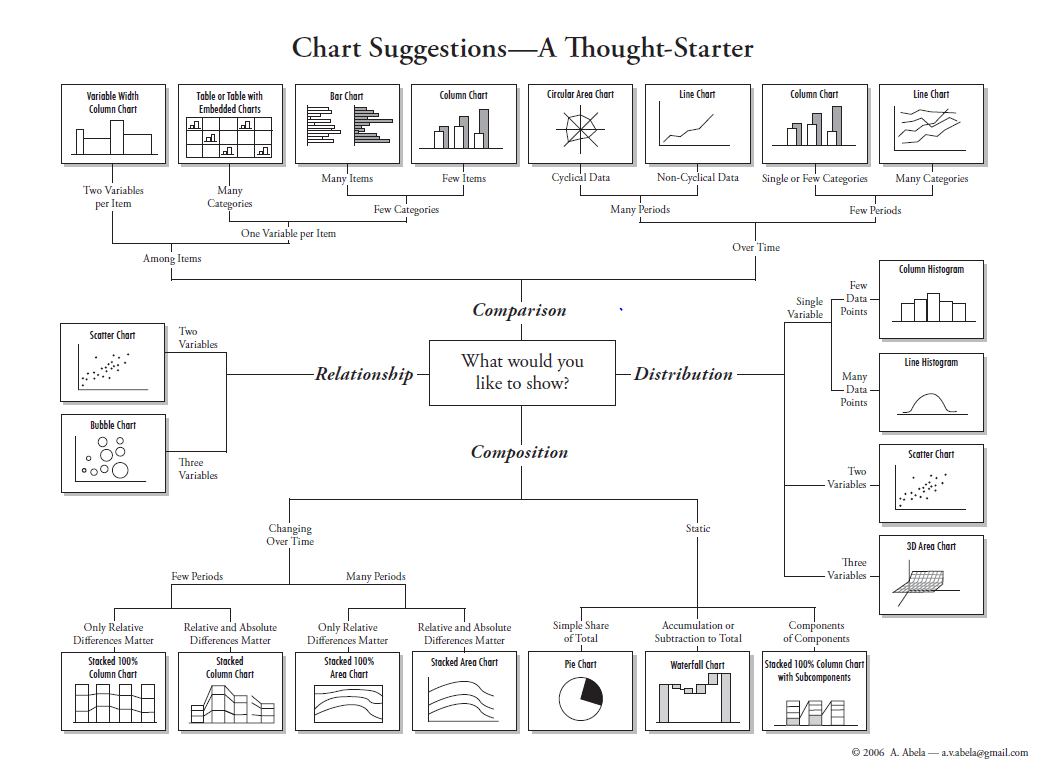

In [8]:
Image("D:/datasets/Curso_Mauel_Garrido/media/chart-chooser-data-visualization.png")

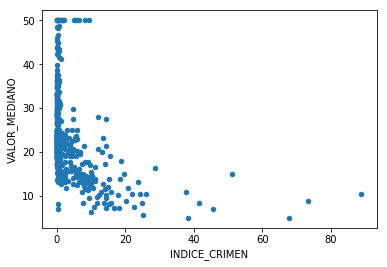

In [11]:
df.plot.scatter(x = "INDICE_CRIMEN", y = "VALOR_MEDIANO")
plt.show()

In [28]:
# Para no tener que decirle siempre a python plt.show(), además obtenemos un grafico más bonito.
%matplotlib notebook

<IPython.core.display.Javascript object>


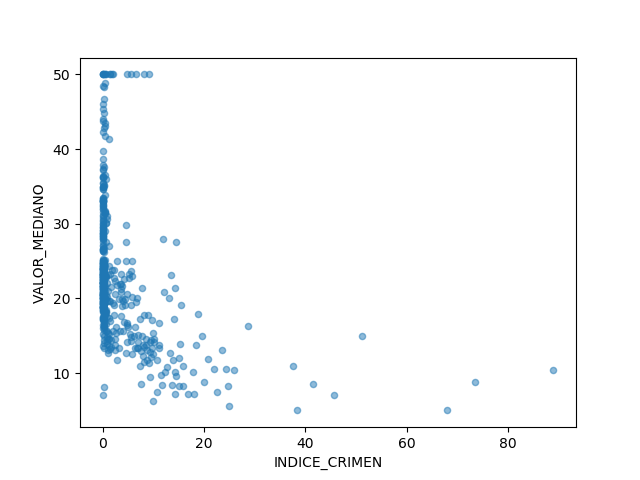

In [20]:
df.plot.scatter(x = "INDICE_CRIMEN", y = "VALOR_MEDIANO", alpha = 0.5)

<IPython.core.display.Javascript object>


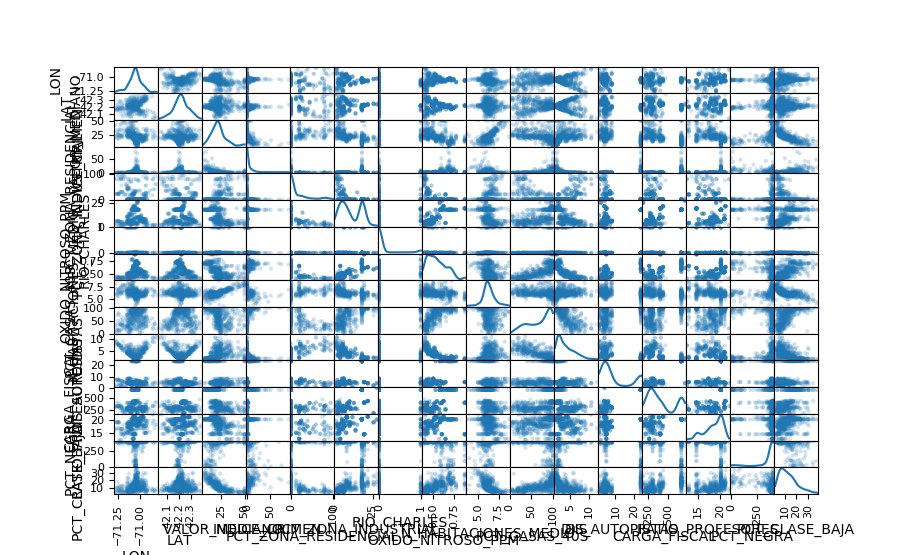

In [21]:
from pandas.plotting import scatter_matrix
sm = scatter_matrix(df, alpha = 0.2, diagonal = "kde")

Este es uno de los problemas de matplotlib, que su api es bastante complicada si quieres hacer algo que se salga de lo corriente. Por ejemplo, en este caso necesitamos un montón de código para rotar las etiquetas de los ejes

<IPython.core.display.Javascript object>


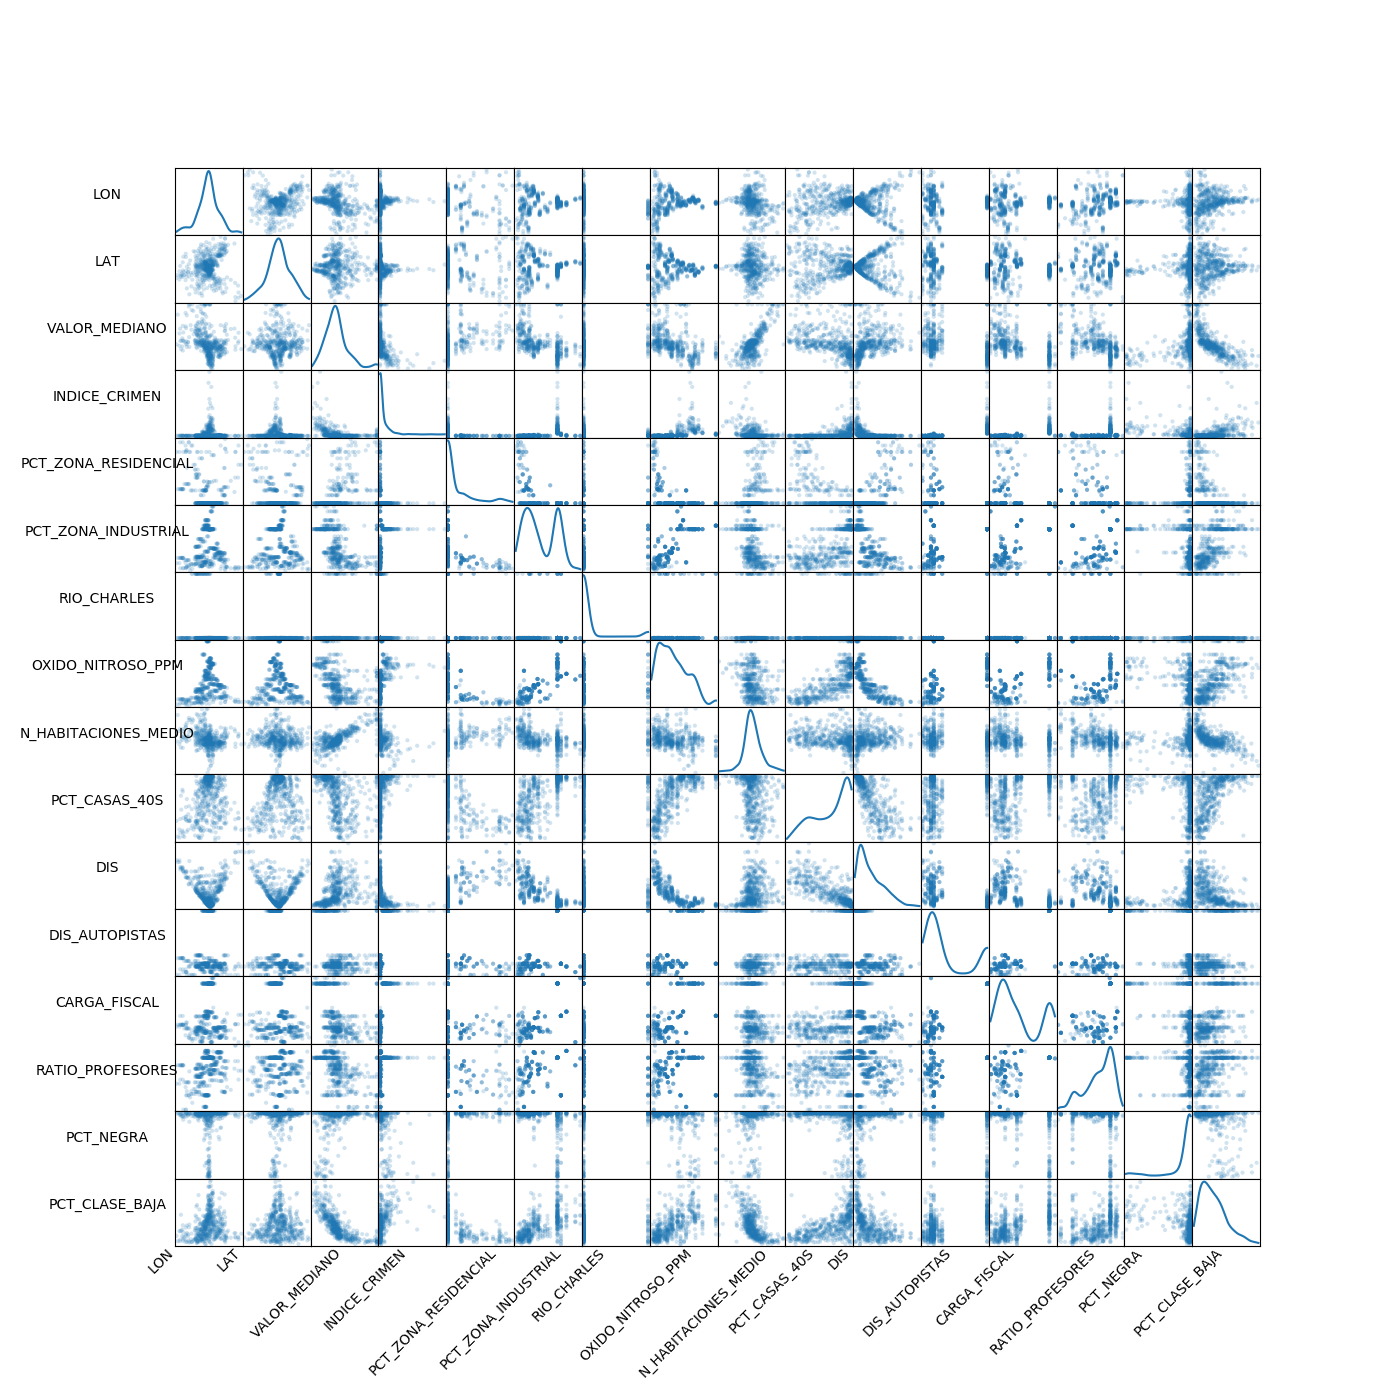

In [23]:
sm = scatter_matrix(df, alpha=0.2, figsize=(14, 14), diagonal='kde')

#https://stackoverflow.com/questions/32560932/how-to-customize-a-scatter-matrix-to-see-all-titles
#Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]
[s.get_xaxis().set_label_coords(-0.2,0) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)];

<IPython.core.display.Javascript object>


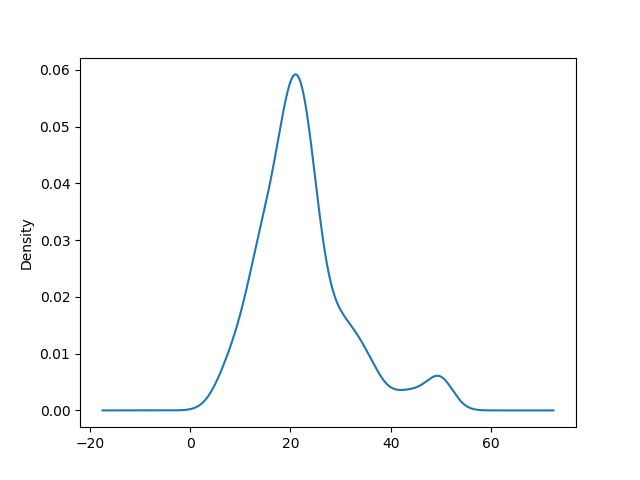

In [29]:
df.VALOR_MEDIANO.plot.kde()

<IPython.core.display.Javascript object>


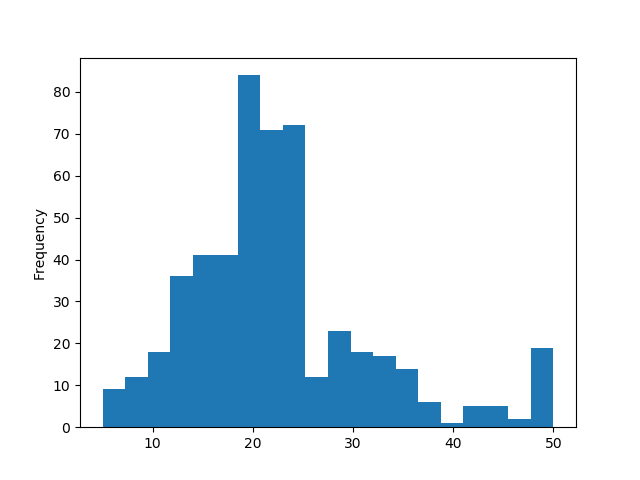

In [32]:
df.VALOR_MEDIANO.plot.hist(bins = 20)

<IPython.core.display.Javascript object>


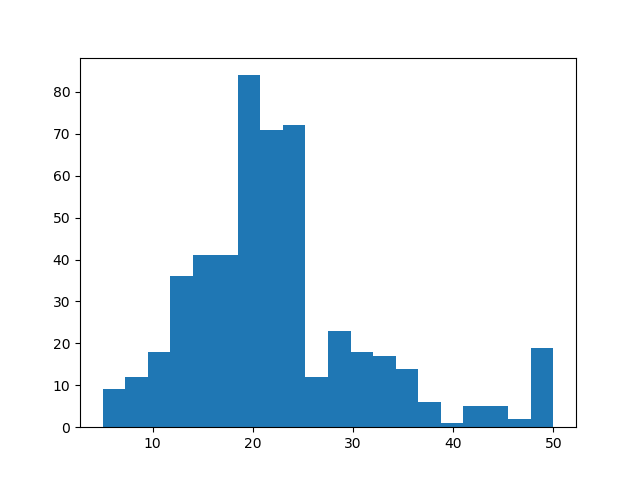

(array([ 9., 12., 18., 36., 41., 41., 84., 71., 72., 12., 23., 18., 17.,
        14.,  6.,  1.,  5.,  5.,  2., 19.]),
 array([ 5.  ,  7.25,  9.5 , 11.75, 14.  , 16.25, 18.5 , 20.75, 23.  ,
        25.25, 27.5 , 29.75, 32.  , 34.25, 36.5 , 38.75, 41.  , 43.25,
        45.5 , 47.75, 50.  ]),
 <a list of 20 Patch objects>)

In [33]:
plt.hist(df["VALOR_MEDIANO"], bins = 20)

<IPython.core.display.Javascript object>


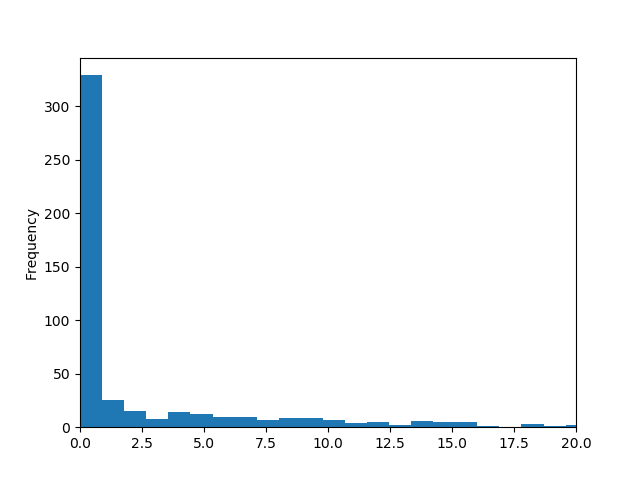

In [39]:
df.INDICE_CRIMEN.plot.hist(xlim = (0, 20), bins = 100)

In [40]:
df.head()

,CIUDAD,LON,LAT,VALOR_MEDIANO,INDICE_CRIMEN,PCT_ZONA_RESIDENCIAL,PCT_ZONA_INDUSTRIAL,RIO_CHARLES,OXIDO_NITROSO_PPM,N_HABITACIONES_MEDIO,PCT_CASAS_40S,DIS,DIS_AUTOPISTAS,CARGA_FISCAL,RATIO_PROFESORES,PCT_NEGRA,PCT_CLASE_BAJA
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


<IPython.core.display.Javascript object>


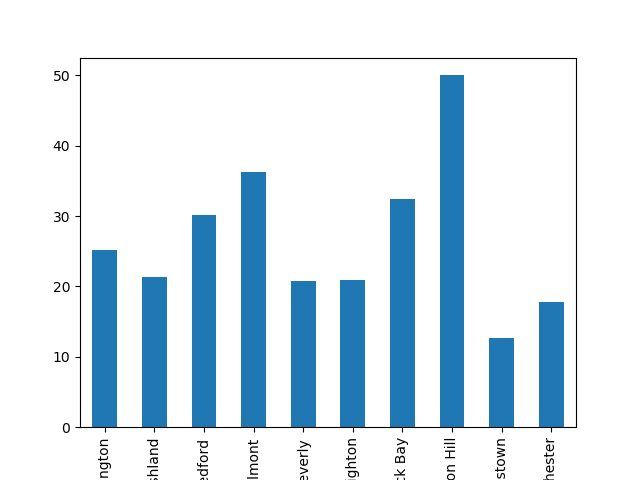

In [43]:
valor_por_ciudad = df.groupby("CIUDAD")["VALOR_MEDIANO"].mean()
valor_por_ciudad.head(10).plot.bar()

<IPython.core.display.Javascript object>


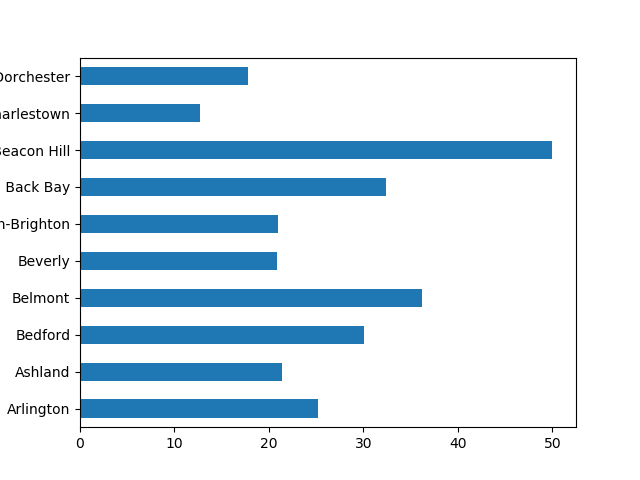

In [44]:
valor_por_ciudad.head(10).plot.barh()

<IPython.core.display.Javascript object>


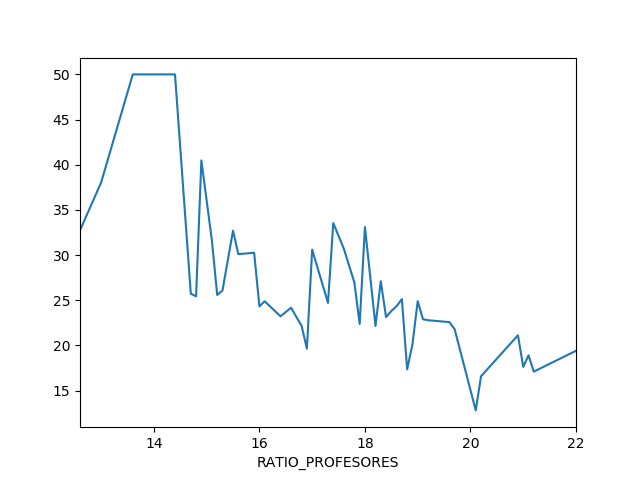

In [45]:
df.groupby("RATIO_PROFESORES").VALOR_MEDIANO.mean().plot.line()

<IPython.core.display.Javascript object>


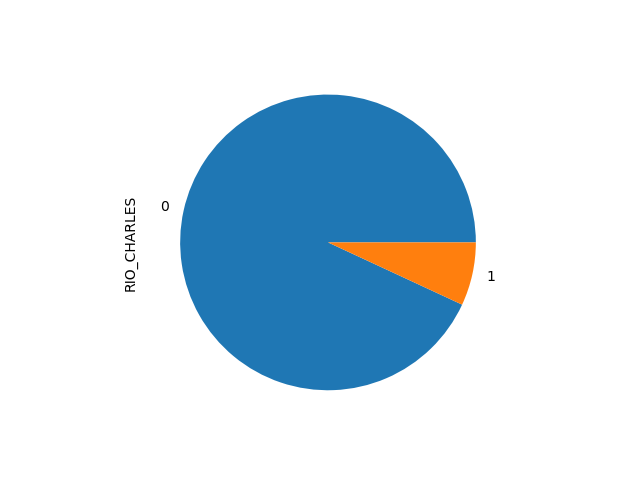

In [47]:
df.RIO_CHARLES.value_counts().plot.pie()

<IPython.core.display.Javascript object>


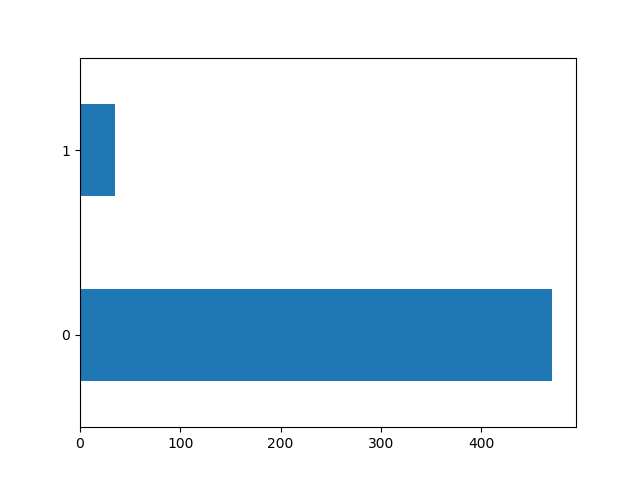

In [49]:
df.RIO_CHARLES.value_counts().plot.barh()